# Example NTV

## Goals

- understand the structure of NTV entities
- present the interest and uses of this entities

## summary
(active link on jupyter Notebook or Nbviewer)
- [All JSON data is JSON-NTV data](#All-JSON-data-is-JSON-NTV-data)
- [NTV data is named](#NTV-data-is-named)
- [NTV data is typed](#NTV-data-is-typed)
- [Types can be predefined](#Types-can-be-predefined)
- [Types are nested](#Types-are-nested)
- [Custom types are allowed](#Custom-types-are-allowed)
- [NTV data is nested](#NTV-data-is-nested)
- [NTV-json representation is equivalent to NTV entity](#NTV-json-representation-is-equivalent-to-NTV-entity)
- [Options are available for NTV-json](#Options-are-available-for-NTV-json)
- [Structured entities NtvList and NtvSet are compatible](#Structured-entities-NtvList-and-NtvSet-are-compatible)
- [NTV entities are compatible with tabular data tools](#NTV-entities-are-compatible-with-tabular-data-tools)
- [NTV data can be created from entities of all types](#NTV-data-can-be-created-from-entities-of-all-types)
- [NTV can be used with custom entities](#NTV-can-be-used-with-custom-entities)

## references
- [JSON-NTV specification](https://github.com/loco-philippe/NTV/blob/main/documentation/JSON-NTV-standard.pdf)

This Notebook can also be viewed at [nbviewer](http://nbviewer.org/github/loco-philippe/NTV/tree/main/example)

-----

In [1]:
from json_ntv import NtvSingle, NtvList, NtvSet, Ntv, NtvConnector, NtvType, Namespace

## All JSON data is JSON-NTV data
NTV entities : 
- NtvSingle : primitive entity which is not composed of any other entity
- NtvList : ordered sequence of NTV entities
- NtvSet : unordered collection of named NTV entities

In [2]:
liste = [None, 1, [1,2], {'key': 'value'}, {'key1': 'val1', 'key2': 'val2'}, 
         {'example': [21, [1,2], {'key1': 3, 'key2': 4}]}]
for json in liste:
    ntv = Ntv.obj(json)
    print('{:<50} {} {}'.format(str(ntv), 'NTV entity : ', type(ntv)))

null                                               NTV entity :  <class 'json_ntv.ntv.NtvSingle'>
1                                                  NTV entity :  <class 'json_ntv.ntv.NtvSingle'>
[1, 2]                                             NTV entity :  <class 'json_ntv.ntv.NtvList'>
{"key": "value"}                                   NTV entity :  <class 'json_ntv.ntv.NtvSingle'>
{"key1": "val1", "key2": "val2"}                   NTV entity :  <class 'json_ntv.ntv.NtvSet'>
{"example": [21, [1, 2], {"key1": 3, "key2": 4}]}  NTV entity :  <class 'json_ntv.ntv.NtvList'>


## NTV data is named
- a name can be added or remove

In [3]:
simple = Ntv.obj(3)

print('simple data              : ', simple)
simple.set_name('value')
print('simple data with name    : ', simple)
simple.set_name('')
print('simple data without name : ', simple)

simple data              :  3
simple data with name    :  {"value": 3}
simple data without name :  3


## NTV data is typed
- default type is 'json'


In [4]:
# {':json' : 21} and 21 are equivalent
number = 21
typed_number = {':json' : 21}
comparison = Ntv.obj(typed_number) == Ntv.obj(number)
print("Are {':json' : 21} and 21 equivalent ? ", comparison)

Are {':json' : 21} and 21 equivalent ?  True


## Types can be predefined
- many standard types are included

{'paris': <shapely.geometry.point.Point object at 0x000001272FB5CA00>}


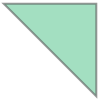

In [5]:
# {'paris:point' : [4.1, 40.5] } indicates that the object named 'paris' has geographical coordinates [4.1, 40.5]
city = Ntv.obj({'paris:point' : [4.1, 40.5] })
print(city.to_obj(encode_format='obj'))

# another coordinates are available (e.g. line, polygon)
city = Ntv.obj({':polygon' : [[[0,1], [1,1], [1,0], [0,1]]] })
city.to_obj(encode_format='obj')

## Types are nested
- a Type is defined by a name and a Namespace.  
- a Namespace is represented by a string followed by a point. Namespaces may be nested


In [6]:
picardie = NtvSet.obj({'picardie::fr.':{'oise:dep': '60', 'aisne:dep': '02', 'somme:dep': '80', 'hauts de france:reg': 32}})

# 'dep' is a type (french department) defined in the Namespace 'fr.' (french types)
# the default Namespace 'fr.' is aggregated with the 'dep' type

print(picardie, '\n')
print(picardie[0])

# '60' is the 'fr.dep' code for the department of Oise


{"picardie::fr.": {"oise:dep": "60", "aisne:dep": "02", "somme:dep": "80", "hauts de france:reg": 32}} 

{"oise:fr.dep": "60"}


## Custom types are allowed
For example:
- object defined by a list of parameters
- object defined by a list of key/values.

In [7]:
measurement = Ntv.obj({':$sensor': [3.51, 4.2, 'mg/m3', [4.1, 45.2]]})

print('measurement : ', measurement)
print('infos : ', measurement[1], measurement[3], measurement.type_str, '\n')

person = Ntv.obj({'main Breaking Bad character:$character': {'surname': 'white', 'first name': 'walter', 'alias': 'heisenberg'}})

print('personage : ', person)
print('infos : ', person['alias'], person.type_str)

measurement :  {":$sensor": [3.51, 4.2, "mg/m3", [4.1, 45.2]]}
infos :  4.2 [4.1, 45.2] $sensor 

personage :  {"main Breaking Bad character:$character": {"surname": "white", "first name": "walter", "alias": "heisenberg"}}
infos :  heisenberg $character


## NTV data is nested
- Two structures with ordered or non ordered collections are available
- The type can be shared between entities included in the same entity
- The type defined in a structure is a default type
- Two NTV structures are equal if the name and the value are equals (the default type can be different)

In [8]:
# ordered structure
cities1 = Ntv.obj({'cities':        [{'paris:point': [4.1, 40.5]}, {':point': [4.5, 41.2]}]})
cities2 = Ntv.obj({'cities::point': [{'paris':       [4.1, 40.5]},            [4.5, 41.2] ]})

# unordered structure
cities3 = Ntv.obj({'cities::point': {'paris':       [4.1, 40.5], 'lyon':       [4.5, 41.2]}})
cities4 = Ntv.obj({'cities':        {'paris:point': [4.1, 40.5], 'lyon:point': [4.5, 41.2]}})

print('equivalent structures ? ', cities1 == cities2 and cities3 == cities4)

# default type in a structure
cities5 = Ntv.obj({'cities::point': [{'paris': [4.1, 40.5]}, [4.5, 41.2], {':date': '2012-02-15'}]})
print('coordinates and date in a typed structure : ', cities5)

equivalent structures ?  True
coordinates and date in a typed structure :  {"cities::point": [{"paris": [4.1, 40.5]}, [4.5, 41.2], {":date": "2012-02-15"}]}


## NTV-json representation is equivalent to NTV entity
- The entity build with the Json representation of another entity is identical to the original NTV entity

In [9]:
Ntv.obj(simple. to_obj()) == simple  and \
Ntv.obj(city.   to_obj()) == city    and \
Ntv.obj(cities2.to_obj()) == cities2 and \
Ntv.obj(cities4.to_obj()) == cities4

True

## Options are available for NTV-json
- selected values
- encoded data
- data format

In [10]:
print('Json format   : ', cities2.to_obj())
print('only values   : ', cities2.to_obj(simpleval=True))
print('Json text     : ', cities2.to_obj(encoded=True))
print('Json binary   : ', cities2.to_obj(encode_format='cbor', encoded=True))
print('tuple format  : ', cities2.to_tuple())
print('object format : ', cities2.to_obj(encode_format='obj'))
print('simple Json   : ', cities2.to_repr())
print('Json codes    : ', cities2.to_repr(False, False, False)) 
# Codification : first letter: "v" (NtvSingle), "l" (NtvList), "s" (NtvSet), additional letters: 'N' (named), 'T' (typed)

Json format   :  {'cities::point': [{'paris': [4.1, 40.5]}, [4.5, 41.2]]}
only values   :  [[4.1, 40.5], [4.5, 41.2]]
Json text     :  {"cities::point": [{"paris": [4.1, 40.5]}, [4.5, 41.2]]}
Json binary   :  b'\xa1mcities::point\x82\xa1eparis\x82\xfb@\x10ffffff\xf9Q\x10\x82\xf9D\x80\xfb@D\x99\x99\x99\x99\x99\x9a'
tuple format  :  ('NtvList', 'cities', 'point', [('NtvSingle', 'paris', 'point', [4.1, 40.5]), ('NtvSingle', '', 'point', [4.5, 41.2])])
object format :  {'cities::point': [{'paris': <shapely.geometry.point.Point object at 0x000001272FB5EA40>}, <shapely.geometry.point.Point object at 0x000001272FB5FD60>]}
simple Json   :  {'l-cities-point': ['v-paris-point-[4.1, 40.5]', 'v-point-[4.5, 41.2]']}
Json codes    :  {'lNT': ['vNT', 'vT']}


## Structured entities NtvList and NtvSet are compatible
- if the constraints of the JSON-objects (keys are present and different, the order is respected)

In [11]:
ntv_lis = Ntv.obj({'structured': [{'key1': 'value1'}, {'key2': 'value2'}]})
ntv_set = NtvSet(ntv_lis)

print('ntv - NtvList : ', ntv_lis)
print('ntv - NtvSet  : ', ntv_set)

print('\nAre the entities compatible ?', NtvList(NtvSet(ntv_lis)) == ntv_lis and NtvSet(NtvList(ntv_set)) == ntv_set)

ntv - NtvList :  {"structured": [{"key1": "value1"}, {"key2": "value2"}]}
ntv - NtvSet  :  {"structured": {"key1": "value1", "key2": "value2"}}

Are the entities compatible ? True


## NTV entities are compatible with tabular data tools
- Example with Pandas

In [12]:
field_data = {'dates::datetime': ['1964-01-01', '1985-02-05', '2022-01-21']}
tab_data   = {'index':           [1, 2, 3],
              'dates::datetime': ['1964-01-01', '1985-02-05', '2022-01-21'], 
              'value':           [10, 20, 30],
              'value32::int32':  [10, 20, 30],
              'coord::point':    [[1,2], [3,4], [5,6]],
              'names::string':   ['john', 'eric', 'judith']}

field = Ntv.obj({':field': field_data})
tab   = Ntv.obj({':tab'  : tab_data})

# the DataFrame Connector is associated with NtvType 'tab' in dicobj 
sr = field.to_obj(encode_format='obj', dicobj={'field': 'SeriesConnec'})
df = tab.to_obj  (encode_format='obj', dicobj={'tab': 'DataFrameConnec'})

# pandas dtype conform to Ntv type
print(sr, '\n')
print(df.dtypes)
df

0   1964-01-01
1   1985-02-05
2   2022-01-21
Name: dates, dtype: datetime64[ns] 

dates      datetime64[ns]
value               int64
value32             int32
coord              object
names              string
dtype: object


C:\Opensource\anaconda3\envs\observ_v10_20230309\lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,dates,value,value32,coord,names
index,,,,,
1,1964-01-01,10,10,POINT (1 2),john
2,1985-02-05,20,20,POINT (3 4),eric
3,2022-01-21,30,30,POINT (5 6),judith


In [13]:
# the dataframe generated from NTV data from a first dataframe is identical to this first dataframe
df2 = Ntv.obj(df).to_obj(encode_format='obj', dicobj={'tab': 'DataFrameConnec'})
print('df2 is identical to df ? ', df2.equals(df))


df2 is identical to df ?  True


C:\Opensource\anaconda3\envs\observ_v10_20230309\lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


## NTV data can be created from entities of all types
- the conversions are made from the defined connectors

In [14]:
ntv = ntv.obj({'dataframe::tab': [df, df2], 'series::field': [sr], 'coord::point': [[1,2], [3,4], [5,6]], 'name': 'walter'})
print('simple representation : ', repr(ntv), '\n')

#ntv is converted into json data
print('json representation :\n', ntv, '\n')

#ntv is converted into objects according to the chosen connectors
data = ntv.to_obj(encode_format='obj', dicobj={'tab': 'DataFrameConnec', 'field': 'SeriesConnec'})
print('data without conversion :\n', data['name'], '\n')
print('data with conversion :\n')
data['dataframe::tab'][0] # 'tab' type is converted into DataFrame object 

simple representation :  {"s": [{"lNT": ["vT", "vT"]}, {"lNT": ["vT"]}, {"lNT": ["vT", "vT", "vT"]}, "vN"]} 

json representation :
 {"dataframe::tab": [{"index:": [1, 2, 3], "dates::datetime": ["1964-01-01T00:00:00.000", "1985-02-05T00:00:00.000", "2022-01-21T00:00:00.000"], "value:": [10, 20, 30], "value32::int32": [10, 20, 30], "coord::point": [[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]], "names::string": ["john", "eric", "judith"]}, {"index:": [1, 2, 3], "dates::datetime": ["1964-01-01T00:00:00.000", "1985-02-05T00:00:00.000", "2022-01-21T00:00:00.000"], "value:": [10, 20, 30], "value32::int32": [10, 20, 30], "coord::point": [[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]], "names::string": ["john", "eric", "judith"]}], "series::field": [{"dates::datetime": ["1964-01-01T00:00:00.000", "1985-02-05T00:00:00.000", "2022-01-21T00:00:00.000"]}], "coord::point": [[1, 2], [3, 4], [5, 6]], "name": "walter"} 

data without conversion :
 walter 

data with conversion :



C:\Opensource\anaconda3\envs\observ_v10_20230309\lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Opensource\anaconda3\envs\observ_v10_20230309\lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Opensource\anaconda3\envs\observ_v10_20230309\lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Opensource\anaconda3\envs\observ_v10_20230309\lib\site-packages\pandas\core\dtypes\ca

,dates,value,value32,coord,names
index,,,,,
1,1964-01-01,10,10,POINT (1 2),john
2,1985-02-05,20,20,POINT (3 4),eric
3,2022-01-21,30,30,POINT (5 6),judith


## NTV can be used with custom entities
- custom data is integrated with two conversion methods : from_ntv, to_ntv

In [15]:
'''
Example :
- custom class : Sensor
- custom type : '$sensor'
- custom conversion class : SensorConnec
'''

from dataclasses import dataclass
import datetime

# custom classes
@dataclass
class Sensor:
    name: str
    measurement: float
    unit: str
    coord: list
    date: datetime.datetime

class SensorConnec(NtvConnector):

    clas_obj = 'sensor'

    @staticmethod
    def from_ntv(ntv_value):
        '''convert ntv_value into the return object'''
        return Sensor(*ntv_value[0:4], datetime.datetime.fromisoformat(ntv_value[4]))
    
    def to_ntv(self):
        ''' convert object into the NTV entity (name, type, value)'''
        return (None, '$sensor', [self.name, self.measurement, self.unit, self.coord, self.date.isoformat()])

# custom data
val1 = Sensor('sensor1', 4.2, 'mg/l', [4,42], datetime.datetime(2021, 2, 5))
val2 = Sensor('sensor1', 5.1, 'mg/l', [4,42], datetime.datetime(2021, 2, 10))
val3 = ["sensor2", 4.2, "mg/l", [5, 42], '2021-04-06']

# simple value
print('representation class Sensor :\n', val1, '\n')
ntv1 = Ntv.obj(val1)
print('representation NTV (to_ntv) :\n',ntv1, '\n')
val1_bis = ntv1.to_obj(encode_format='obj', dicobj={'$sensor': 'SensorConnec'})
print('reflexivity of conversion ? ', val1_bis == val1, '\n')

# assembly value
first_test = {'campaign': 'first test', 'result::$sensor': [val1, val2, val3], 'date measure:datetime': '2012-01-10'}
first_test_ntv = Ntv.obj(first_test)
print("'first test' representation NTV :\n",first_test_ntv, '\n') 

first_test_obj = first_test_ntv.to_obj(encode_format='obj', dicobj={'$sensor': 'SensorConnec'})
print("'first test' representation with object :\n", first_test_obj["result::$sensor"][0])

representation class Sensor :
 Sensor(name='sensor1', measurement=4.2, unit='mg/l', coord=[4, 42], date=datetime.datetime(2021, 2, 5, 0, 0)) 

representation NTV (to_ntv) :
 {":$sensor": ["sensor1", 4.2, "mg/l", [4, 42], "2021-02-05T00:00:00"]} 

reflexivity of conversion ?  True 

'first test' representation NTV :
 {"campaign": "first test", "result::$sensor": [["sensor1", 4.2, "mg/l", [4, 42], "2021-02-05T00:00:00"], ["sensor1", 5.1, "mg/l", [4, 42], "2021-02-10T00:00:00"], ["sensor2", 4.2, "mg/l", [5, 42], "2021-04-06"]], "date measure:datetime": "2012-01-10"} 

'first test' representation with object :
 Sensor(name='sensor1', measurement=4.2, unit='mg/l', coord=[4, 42], date=datetime.datetime(2021, 2, 5, 0, 0))
